In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import os
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
sns.set_style("white")
import datetime

In [2]:
df=pd.read_csv("Uber Request Data.csv")
df[['Request timestamp','Drop timestamp']] =df[['Request timestamp','Drop timestamp']].apply(pd.to_datetime)
df['Request_Date'] = df['Request timestamp'].dt.date
df['Request_DOW'] = pd.DatetimeIndex ( df['Request timestamp'] ).dayofweek #.dayofweek
df['Request_DayName'] = pd.DatetimeIndex ( df['Request timestamp'] ).day_name() #.dayofweek
df['Request_DOM'] = pd.DatetimeIndex ( df['Request timestamp'] ).day #dayofmonth
df['Request_Month'] = pd.DatetimeIndex ( df['Request timestamp'] ).month #month
#df['Request_DOY'] = pd.DatetimeIndex ( df['Request timestamp'] ).dayofyear #dayofyear
df['Request_HOD'] = pd.DatetimeIndex ( df['Request timestamp'] ).hour #hour
df['Request_WOM'] = (df['Request_DOM']-1)//7+1
df['Freq']=[1]*len(df)
dfStatus = pd.DataFrame( list(zip(df.Status.unique(), [1,2,3]))  )
dfStatus.columns = ['Status','StatusId']
df = df.merge(dfStatus, how="inner", on ="Status")

pd.options.mode.chained_assignment = None

In [3]:
print ("Pickup Locations :",df['Pickup point'].unique())

Pickup Locations : ['Airport' 'City']


In [4]:
print ("Number of day's data available for analysis :" ,len(df.Request_Date.unique()) , "\n")
print ("Date :", df.Request_Date.unique())

Number of day's data available for analysis : 5 

Date : [datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


In [5]:
print ("Only {} day's of week data available for analysis :".format(len(df.Request_DayName.unique())) , "\n")
print ("Date :", df.Request_DayName.unique())

Only 4 day's of week data available for analysis : 

Date : ['Monday' 'Wednesday' 'Thursday' 'Friday']


In [6]:
df.pivot_table(columns='Pickup point', values='Request id', aggfunc=len )
#City and Airport data is almost in equal amount.

Pickup point,Airport,City
Request id,3238,3507


In [7]:
dfStatus

,Status,StatusId
0,Trip Completed,1
1,Cancelled,2
2,No Cars Available,3


D:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


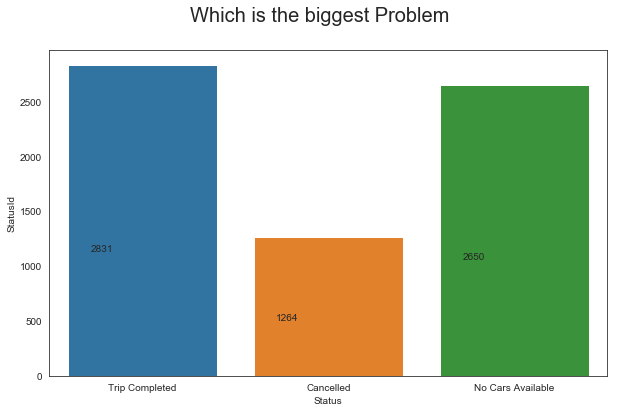

In [8]:
#Plot the status ID
fig = plt.figure(figsize=(10,6))

sns.barplot(data=df, x="Status", y="StatusId",estimator=len)
ax=plt.gca()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))
    
fig.suptitle('Which is the biggest Problem', fontsize=20)

plt.show()
plt.title="Most Pressing Problem"

In [9]:
df.sort_values(['Request_DOW','Pickup point'], inplace=True)

df_completed =df[df.StatusId==1]
df_completed.sort_values(['Request_DOW','Pickup point'], inplace=True)

df_cancelled  =df[df.StatusId==2]
df_cancelled.sort_values(['Request_DOW','Pickup point'], inplace=True)

df_notAvailable = df[df.StatusId==3]
df_notAvailable.sort_values(['Request_DOW','Pickup point'], inplace=True)


## Overall Demand (including completed, cancelled, not available)

Text(0.5, 0.98, 'Car Demand at Airport - Hours of the Day')

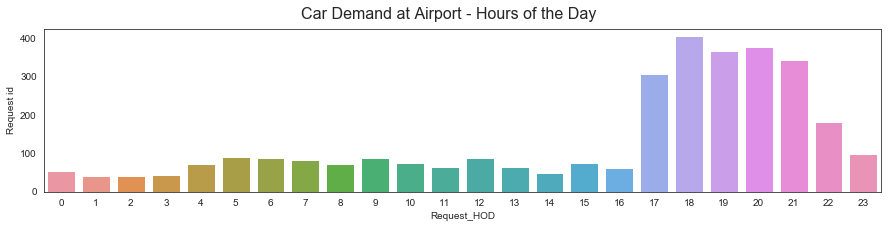

In [10]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")
sns.barplot(data=df[ df["Pickup point"]=="Airport"], x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Car Demand at Airport - Hours of the Day', fontsize=16)

Text(0.5, 0.98, 'Car Demand in City - Hours of the Day')

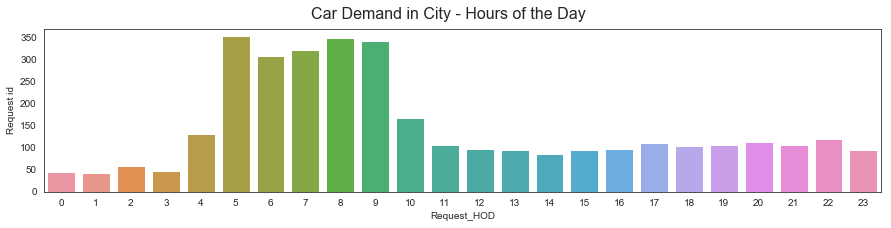

In [11]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")
sns.barplot(data=df[ df["Pickup point"]=="City"], x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Car Demand in City - Hours of the Day', fontsize=16)

Text(0.5, 0.98, 'Car Demand Hours - Hours of the Day')

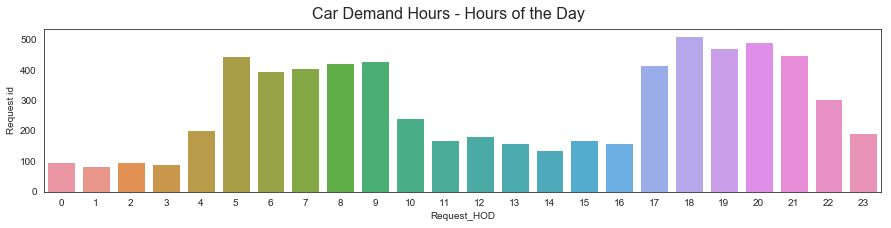

In [12]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")
sns.barplot(data=df, x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Car Demand Hours - Hours of the Day', fontsize=16)


#Most of the car not availablity is happening in between 5 to 10 PM

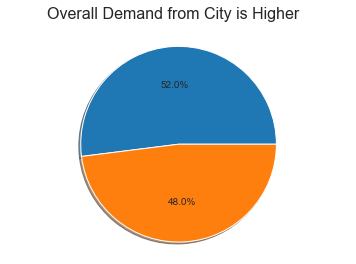

In [13]:
fig, ax = plt.subplots()
ax.pie(df['Pickup point'].value_counts(),  autopct='%1.1f%%', shadow=True)
ax.axis('equal')
fig.suptitle('Overall Demand from City is Higher', fontsize=16)  
plt.show()

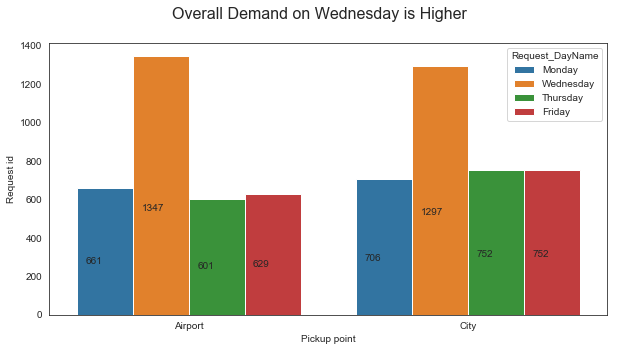

In [14]:
#Apart from Wednesday every other day demand from city or airport is less than the average of the respective place

fig= plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Pickup point", y="Request id", hue='Request_DayName',estimator=len)
fig.suptitle('Overall Demand on Wednesday is Higher', fontsize=16)  
ax=plt.gca()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

In [15]:
df1=df.groupby("Pickup point")["Request_DayName"].value_counts().unstack()
df1=df.groupby("Request_DayName")["Pickup point"].value_counts().unstack()

print ("Airport (Mean) :" ,df1.Airport.mean())
print ("City (Mean):", df1.City.mean())
df1['Airport % of Mean'] = df1.Airport/df1.Airport.mean()*100
df1['City % of Mean'] = df1.City/df1.City.mean()*100

print (df1)

Airport (Mean) : 809.5
City (Mean): 876.75
Pickup point     Airport  City  Airport % of Mean  City % of Mean
Request_DayName                                                  
Friday               629   752          77.702285       85.771315
Monday               661   706          81.655343       80.524665
Thursday             601   752          74.243360       85.771315
Wednesday           1347  1297         166.399012      147.932706


## Request Completed Analysis

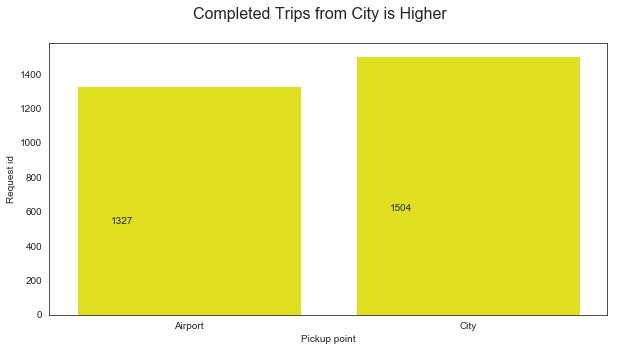

In [16]:
fig= plt.figure(figsize=(10,5))
sns.barplot(data=df_completed, x="Pickup point", y="Request id", estimator=len, color="yellow" )
ax=plt.gca()
fig.suptitle('Completed Trips from City is Higher', fontsize=16)  
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))
    

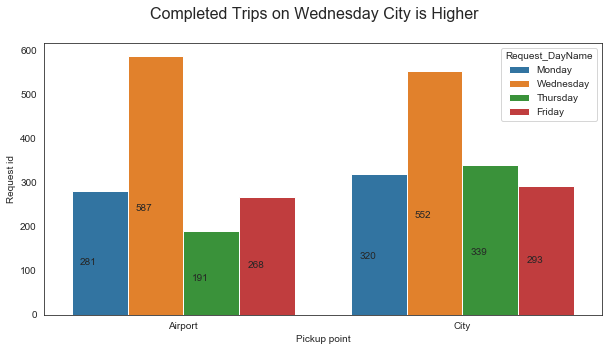

In [17]:
fig=plt.figure(figsize=(10,5))
sns.barplot(data=df_completed, x="Pickup point", y="Request id", hue='Request_DayName',estimator=len)
fig.suptitle('Completed Trips on Wednesday City is Higher', fontsize=16)
ax=plt.gca()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

## Car Non Availability Analysis

Text(0.5, 0.98, 'Car Non-Availablity in City- Hours of the Day')

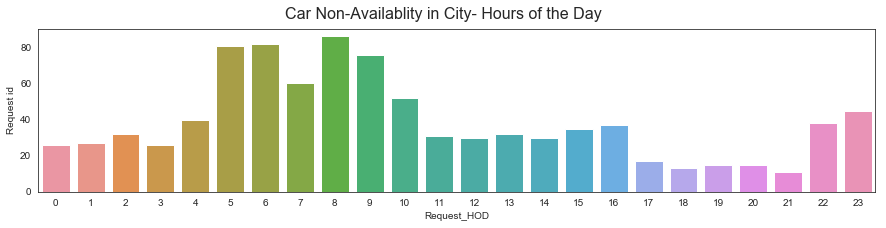

In [18]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")
sns.barplot(data=df_notAvailable[df_notAvailable["Pickup point"]=="City"], x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Car Non-Availablity in City- Hours of the Day', fontsize=16)
#Most of the car not availablity is happening in between 5 to 9 PM

Text(0.5, 0.98, 'Car Non-Availablity at Airport - Hours of the Day')

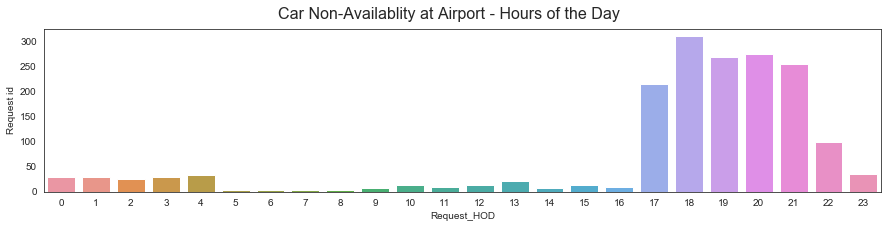

In [19]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")
sns.barplot(data=df_notAvailable[df_notAvailable["Pickup point"]=="Airport"], x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Car Non-Availablity at Airport - Hours of the Day', fontsize=16)
#Most of the car not availablity is happening in between 5 to 9 PM

Text(0.5, 0.98, 'Car Non-Availablity - Hours of the Day')

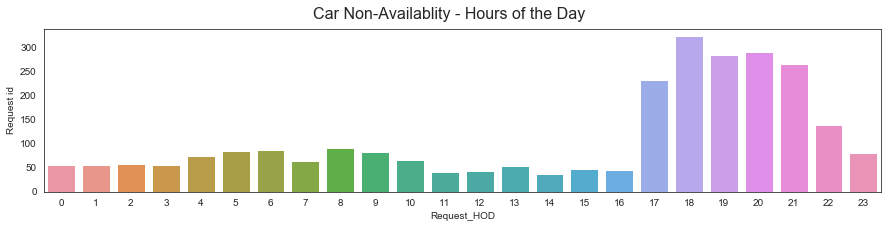

In [20]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")
sns.barplot(data=df_notAvailable, x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Car Non-Availablity - Hours of the Day', fontsize=16)
#Most of the car not availablity is happening in between 5 to 9 PM

Text(0.5, 0.98, 'Car Non-Availablity from Airport - Weekday')

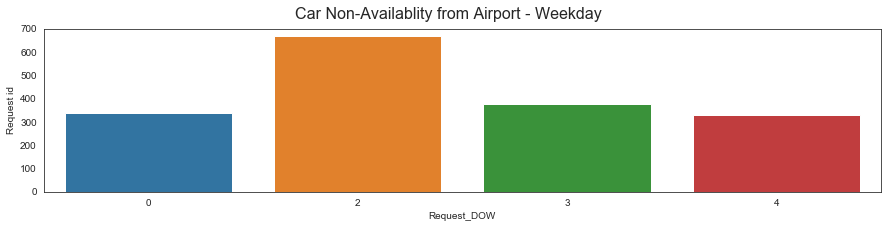

In [21]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")

sns.barplot(data=df_notAvailable[df_notAvailable["Pickup point"]=="Airport"], x="Request_DOW", y="Request id", estimator=len)

fig.suptitle('Car Non-Availablity from Airport - Weekday', fontsize=16)


Text(0.5, 0.98, 'Car Non-Availablity from City - Weekday')

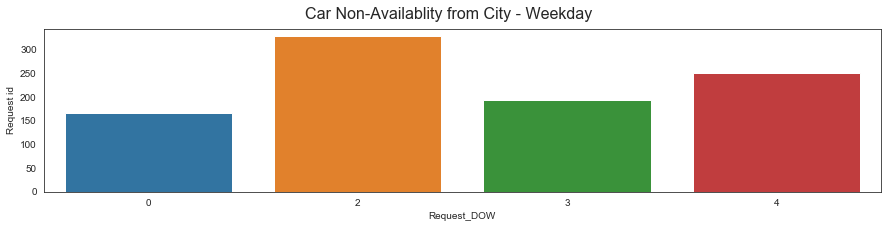

In [22]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")
sns.barplot(data=df_notAvailable[df_notAvailable["Pickup point"]=="City"], x="Request_DOW", y="Request id", estimator=len)

fig.suptitle('Car Non-Availablity from City - Weekday', fontsize=16)


Text(0.5, 0.98, 'Car Non-Availablity - Weekay')

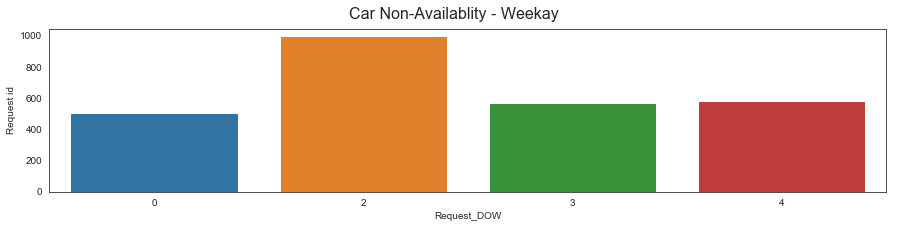

In [23]:
fig=plt.figure(figsize = (15,3))
sns.set_style("white")
sns.barplot(data=df_notAvailable, x="Request_DOW", y="Request id", estimator=len)

fig.suptitle('Car Non-Availablity - Weekay', fontsize=16)
#0 - Monday, 1- Tuesday, 2-Wednesday.....6 - Sunday
# Data is available only of 4 days of the week Mon, Wed, Thu, Fri
# Most of the Car not available problem is on Wed

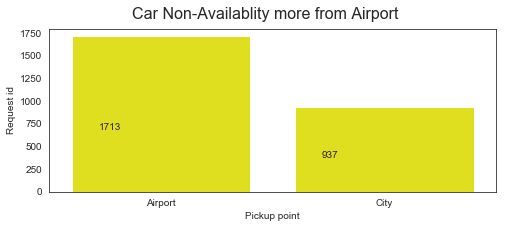

In [24]:
fig=plt.figure(figsize = (8,3))
sns.barplot(data=df_notAvailable, x="Pickup point", y="Request id", estimator=len, color="yellow" )
ax=plt.gca()
fig.suptitle('Car Non-Availablity more from Airport', fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))
    
#Around 100% car non availability problem is from Airport

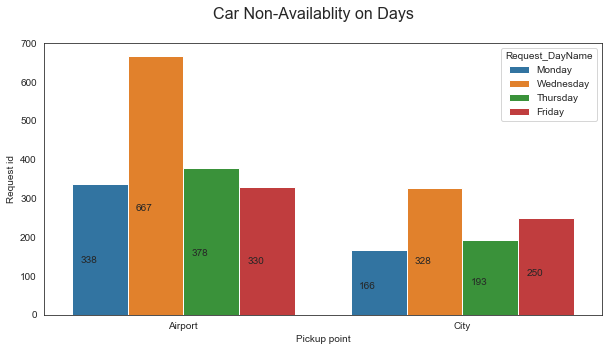

In [25]:
#Overall car non availablity is issue from airport 
#but on Wednesday this problem from city is 140% higher than other days 
#and from Airport this is 155% higher than other days
fig=plt.figure(figsize=(10,5))
sns.barplot(data=df_notAvailable, x="Pickup point", y="Request id", hue='Request_DayName',estimator=len)
fig.suptitle('Car Non-Availablity on Days', fontsize=16)
ax=plt.gca()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

In [26]:
df1=df_notAvailable.groupby("Pickup point")["Request_DayName"].value_counts().unstack()
df1=df_notAvailable.groupby("Request_DayName")["Pickup point"].value_counts().unstack()

print ("Airport (Mean) :" ,df1.Airport.mean())
print ("City (Mean):", df1.City.mean())
df1['Airport % of Mean'] = df1.Airport/df1.Airport.mean()*100
df1['City % of Mean'] = df1.City/df1.City.mean()*100

print (df1)

Airport (Mean) : 428.25
City (Mean): 234.25
Pickup point     Airport  City  Airport % of Mean  City % of Mean
Request_DayName                                                  
Friday               330   250          77.057793      106.723586
Monday               338   166          78.925861       70.864461
Thursday             378   193          88.266200       82.390608
Wednesday            667   328         155.750146      140.021345


## Car Cancelation Analysis

Text(0.5, 0.98, 'Cancellation Problem more in Morning in City')

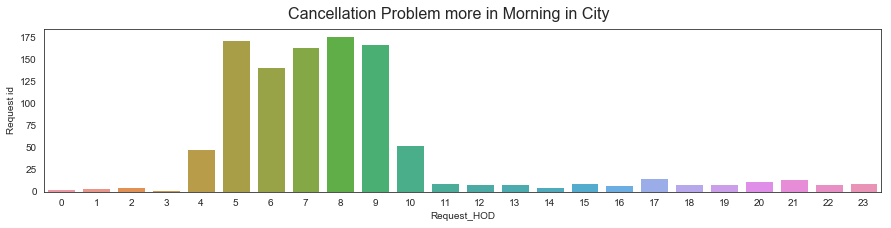

In [27]:
fig=plt.figure(figsize = (15,3))

sns.set_style("white")
sns.barplot(data=df_cancelled [ df_cancelled["Pickup point"]=="City"], x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Cancellation Problem more in Morning in City', fontsize=16)
#Most of the cancellations are happening in between 5 to 9 AM

Text(0.5, 0.98, 'Cancellation Problem more in Evening at Airport')

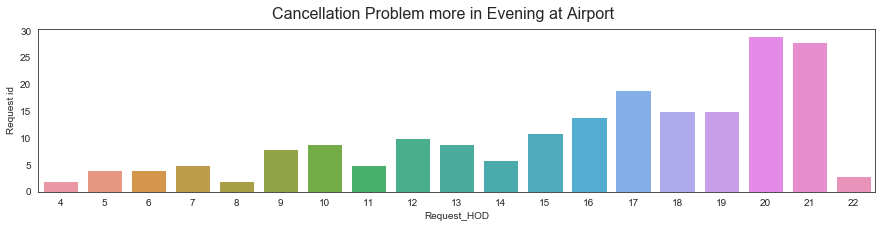

In [28]:
fig=plt.figure(figsize = (15,3))

sns.set_style("white")
sns.barplot(data=df_cancelled[  df_cancelled["Pickup point"]=="Airport" ], x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Cancellation Problem more in Evening at Airport', fontsize=16)
#Most of the cancellations are happening in between 5 to 9 AM

Text(0.5, 0.98, 'Cancellation Problem more in Morning')

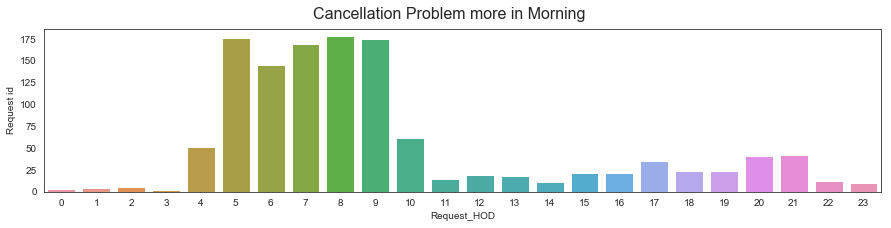

In [29]:
fig=plt.figure(figsize = (15,3))

sns.set_style("white")
sns.barplot(data=df_cancelled, x="Request_HOD", y="Request id", estimator=len)

fig.suptitle('Cancellation Problem more in Morning', fontsize=16)
#Most of the cancellations are happening in between 5 to 9 AM

Text(0.5, 0.98, 'Cancellation Problem more on Wednesday')

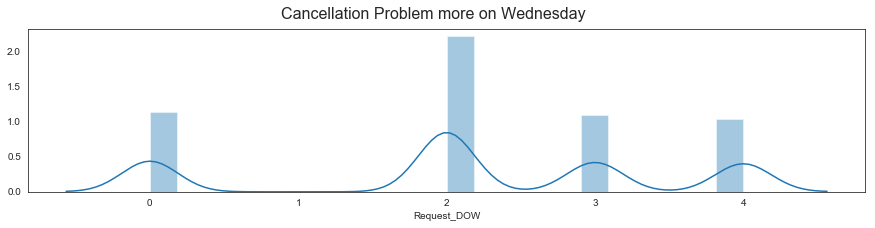

In [30]:
fig=plt.figure(figsize = (15,3))
sns.distplot(df_cancelled.Request_DOW)
fig.suptitle('Cancellation Problem more on Wednesday', fontsize=16)
#0 - Monday, 1- Tuesday, 2-Wednesday.....6 - Sunday
# Data is available only of 4 days of the week Mon, Wed, Thu, Fri
# Most of the Car cancelled problem is on Wed

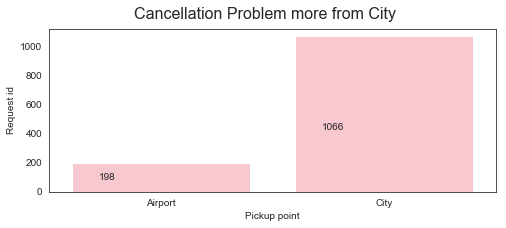

In [31]:
fig=plt.figure(figsize = (8,3))
sns.barplot(data=df_cancelled, x="Pickup point", y="Request id", estimator=len, color="pink")
fig.suptitle('Cancellation Problem more from City', fontsize=16)
ax=plt.gca()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))
    
#More than 500% car cancellation problem is from City

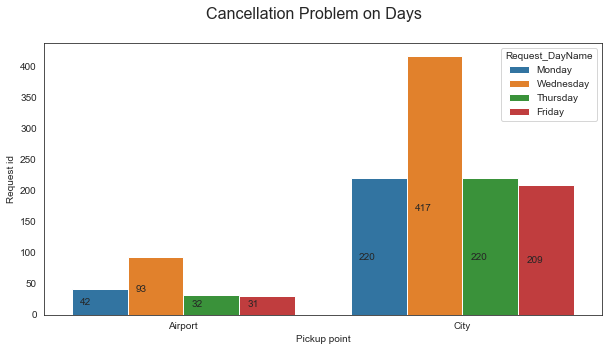

In [32]:
#Overall Cancellation from city is higher than from Airport but 
#largest contribution in this problem is Wed. 
#Compare to average Wed car cancellation from city is 187% higher and 
#from airport is 156% more than average.
fig=plt.figure(figsize=(10,5))

sns.barplot(data=df_cancelled, x="Pickup point", y="Request id", hue='Request_DayName',estimator=len )
fig.suptitle('Cancellation Problem on Days', fontsize=16)
ax=plt.gca()
#ax.legend("topright", df_cancelled.Request_DOW.unique())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

In [33]:
df1=df_cancelled.groupby("Pickup point")["Request_DayName"].value_counts().unstack()
df1=df_cancelled.groupby("Request_DayName")["Pickup point"].value_counts().unstack()

print ("Airport (Mean) :" ,df1.Airport.mean())
print ("City (Mean):", df1.City.mean())
df1['Airport % of Mean'] = df1.Airport/df1.Airport.mean()*100
df1['City % of Mean'] = df1.City/df1.City.mean()*100

print (df1)

Airport (Mean) : 49.5
City (Mean): 266.5
Pickup point     Airport  City  Airport % of Mean  City % of Mean
Request_DayName                                                  
Friday                31   209          62.626263       78.424015
Monday                42   220          84.848485       82.551595
Thursday              32   220          64.646465       82.551595
Wednesday             93   417         187.878788      156.472795


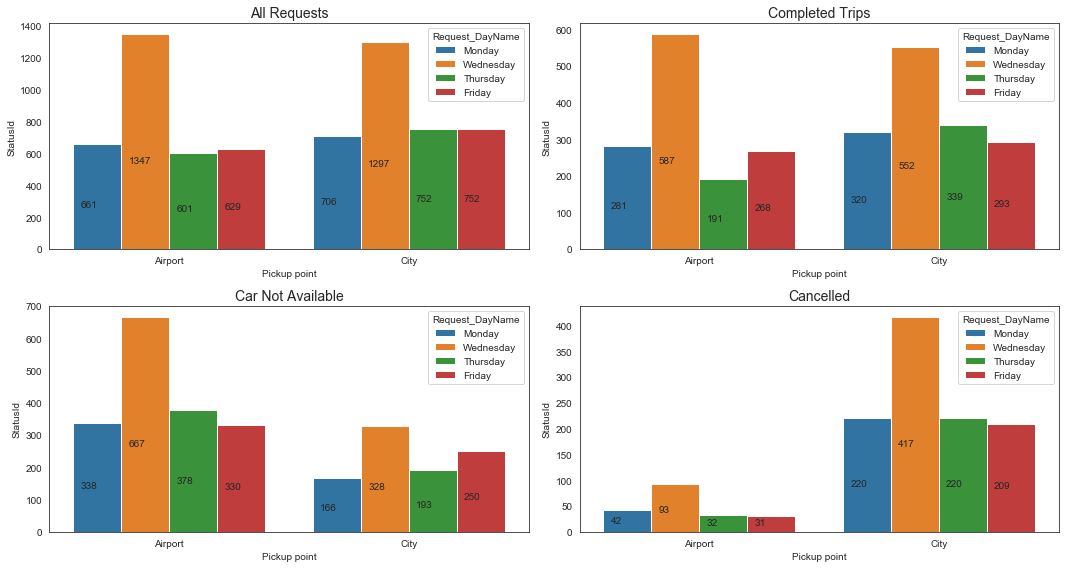

In [34]:
plt.figure(figsize=(15,8))

fig=plt.subplot(2,2,1)
ax=plt.gca()
ax.set_title("All Requests", fontsize=14)
plt.tight_layout()
sns.barplot(data=df, x="Pickup point", y="StatusId", hue="Request_DayName",estimator=len )
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

fig=plt.subplot(2,2,2)
ax=plt.gca()
ax.set_title("Completed Trips", fontsize=14)
plt.tight_layout()
sns.barplot(data=df_completed, x="Pickup point", y="StatusId", hue="Request_DayName",estimator=len )
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

fig=plt.subplot(2,2,3)
ax=plt.gca()
ax.set_title("Car Not Available", fontsize=14)
plt.tight_layout()
sns.barplot(data=df_notAvailable, x="Pickup point", y="StatusId", hue="Request_DayName",estimator=len )
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

fig=plt.subplot(2,2,4)
ax=plt.gca()
ax.set_title("Cancelled", fontsize=14)
plt.tight_layout()
sns.barplot(data=df_cancelled, x="Pickup point", y="StatusId", hue="Request_DayName",estimator=len )
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))


## Canceller's Analysis

In [35]:
#Identify High Canceller Drivers

#List of all the drivers
df3=df.groupby("Driver id")["Status"].value_counts().unstack()
df3.reset_index(inplace=True)

#In any driver has not cancelled any time then mark it 0
df3['Cancelled'] = df3['Cancelled'].fillna(0)

#Calculate Total business given to each Driver
df3['TotalBusinessGiven'] = df3["Cancelled"] + df3["Trip Completed"]

#Calculate cancellation Ratio of each driver
df3['CancellationRatio'] = df3['Cancelled'] / df3['TotalBusinessGiven']


df3=df3.sort_values('CancellationRatio', ascending=False)

#Filter ounly those drivers who has more than 30% cancellation
df_HighCanceller=df3 [ df3.CancellationRatio>.30]
df_HighCanceller["HighCanceller"]="Yes"
df_HighCanceller = df_HighCanceller[["Driver id","HighCanceller"]]

df_merged=df.merge(df_HighCanceller, how="left", on="Driver id")

df_merged.loc[ (df_merged['HighCanceller'] !="Yes")    , 'HighCanceller']="No"
df_merged.loc[ (pd.isna( df_merged['Driver id']))     , 'HighCanceller']="NA"


#df_merged['HighCanceller'] = df_merged['HighCanceller'].fillna(False)

In [36]:
print ("Total number of drivers ",len(df["Driver id"].unique()) )
print ("Driver who cancels >=30% of the business ", len(df_merged[ df_merged.HighCanceller=="Yes"] ["Driver id"].unique()))
print ("Total Booking taken by High Cancel-Driver ", len(df_merged[ df_merged.HighCanceller=="Yes"] ["Request id"].unique()))
print ("Total Booking Cancelled by High Cancel-Driver ", len(
    df_merged[ (df_merged.HighCanceller=="Yes") & (df_merged.Status=="Cancelled")] 
    ["Request id"].unique()))

Total number of drivers  301
Driver who cancels >=30% of the business  143
Total Booking taken by High Cancel-Driver  1988
Total Booking Cancelled by High Cancel-Driver  810


In [37]:
df_merged.groupby("HighCanceller")["Request id"].count()

HighCanceller
NA     2650
No     2107
Yes    1988
Name: Request id, dtype: int64

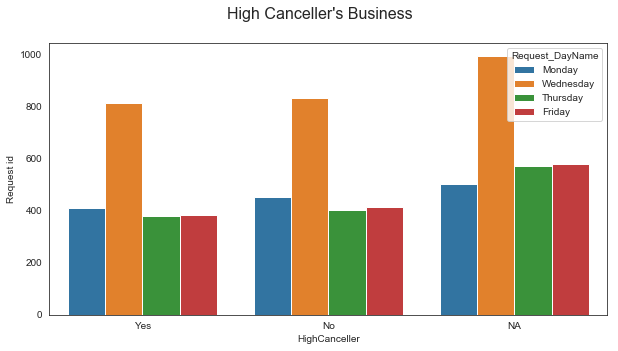

In [38]:
fig=plt.figure(figsize=(10,5))

sns.barplot(data=df_merged, x="HighCanceller", y="Request id", hue='Request_DayName',estimator=len )
fig.suptitle("High Canceller's Business", fontsize=16)
ax=plt.gca()